In [1]:

import numpy as np
import pandas as pd
data = pd.read_csv(r'diabetes.csv')

In [2]:

data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:

data.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:

data.Outcome.value_counts()


0    500
1    268
Name: Outcome, dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

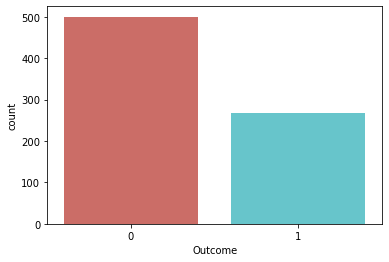

In [7]:

sns.countplot(x='Outcome', data = data, palette='hls')
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

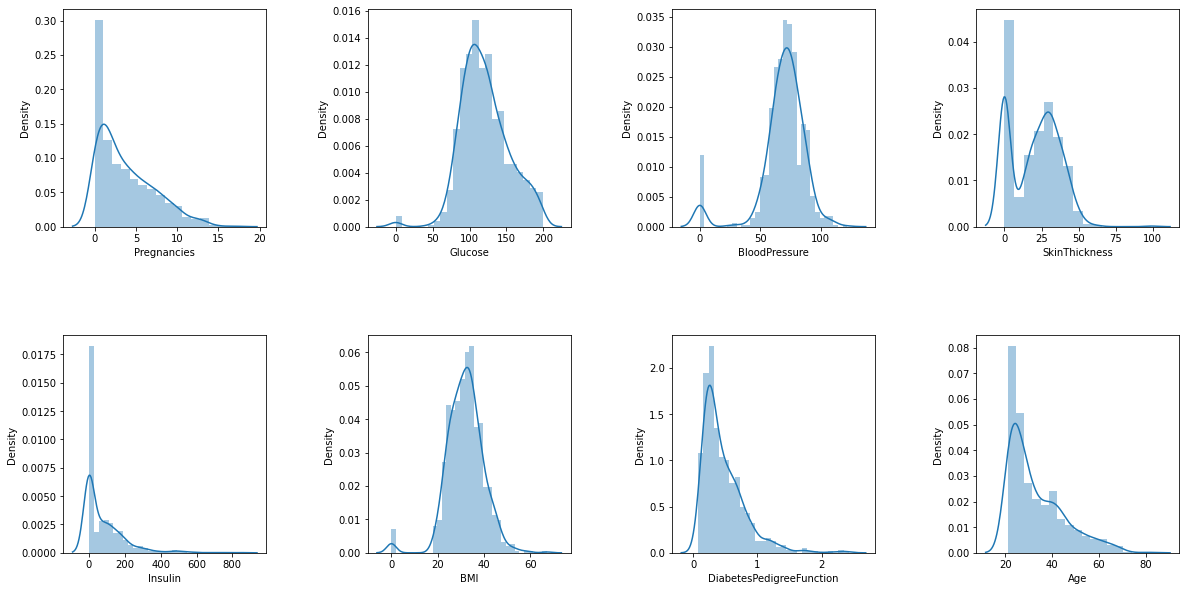

In [8]:
ig, axes = plt.subplots(2,4,figsize=(20,10))
plt.subplot(2,4,1)
sns.distplot(x=data['Pregnancies'])
plt.xlabel('Pregnancies')
plt.subplot(2,4,2)
sns.distplot(x=data['Glucose'])
plt.xlabel('Glucose')
plt.subplot(2,4,3)
sns.distplot(x=data['BloodPressure'])
plt.xlabel('BloodPressure')
plt.subplot(2,4,4)
sns.distplot(x=data['SkinThickness'])
plt.xlabel('SkinThickness')
plt.subplot(2,4,5)
sns.distplot(x=data['Insulin'])
plt.xlabel('Insulin')
plt.subplot(2,4,6)
sns.distplot(x=data['BMI'])
plt.xlabel('BMI')
plt.subplot(2,4,7)
sns.distplot(x=data['DiabetesPedigreeFunction'])
plt.xlabel('DiabetesPedigreeFunction')
plt.subplot(2,4,8)
sns.distplot(x=data['Age'])
plt.xlabel('Age')
warnings.filterwarnings("ignore")
plt.subplots_adjust(hspace = 0.5, wspace=0.5)
plt.show()


In [9]:
X = pd.DataFrame(data.iloc[:,:-1])
y = pd.DataFrame(data.iloc[:,-1])


In [10]:

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:

y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [12]:

from sklearn.model_selection import train_test_split
# test_size = 0.2 means 20% records are in the test set and rest 80% are in the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 1)


In [13]:
X_train.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29


In [15]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
285,7,136,74,26,135,26.0,0.647,51
101,1,151,60,0,0,26.1,0.179,22
581,6,109,60,27,0,25.0,0.206,27
352,3,61,82,28,0,34.4,0.243,46
726,1,116,78,29,180,36.1,0.496,25


In [16]:
y_train.head()

,Outcome
663,1
712,1
161,0
509,0
305,0


In [17]:

y_test.head()


,Outcome
285,0
101,0
581,0
352,0
726,0


In [18]:

print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ",y_test.shape)

X_train.shape:  (614, 8)
y_train.shape:  (614, 1)
X_test.shape:  (154, 8)
y_test.shape:  (154, 1)


In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)


LogisticRegression()

In [21]:
y_pred = logmodel.predict(X_test)


In [22]:

print('Accuracy: ', (logmodel.score(X_test, y_test)))


Accuracy:  0.7792207792207793


In [23]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

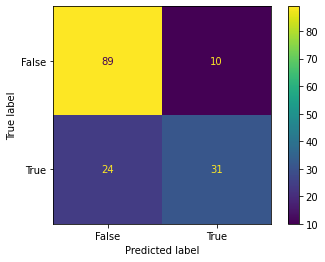

In [24]:

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()


In [25]:

# Calculating accuracy using Confusion Matrix
(89+31)/(89+31+10+24)

0.7792207792207793

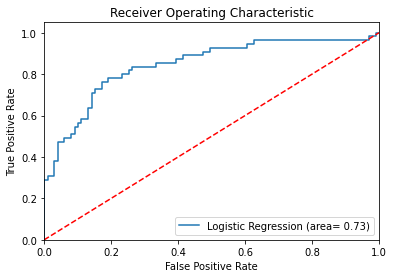

In [26]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area= %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()